<a href="https://colab.research.google.com/github/imakshit/Tensorflow/blob/master/Image_classification_using_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Networks


we will create and use a neural network to classify articles of clothing. To achieve this, we will use a sub module of TensorFlow called *keras*.

In [1]:
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


**Dataset**

we will use MNIST fashion dataset

It includes 60000 images for training and 10000 for testing/validation

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
train_images.shape

(60000, 28, 28)

we've 60k images with 28x28 pixels each

In [11]:
train_images[0,23,23]

194

pixel value is between 0 and 255. 0 being black and 255 being white. This means we have a grayscale image dataset with no colors

In [12]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

our labels are integers from 0 to 9. each represent a specific article of clothing

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Lets look at some images in our dataset**







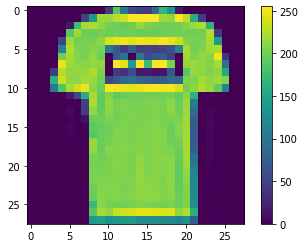

In [17]:
plt.figure
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

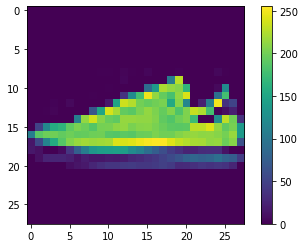

In [18]:
plt.figure
plt.imshow(train_images[6])
plt.colorbar()
plt.grid(False)
plt.show()

**Data preprocessing**

In [0]:
train_images = train_images/255.0

test_images = test_images/255.0

Building The Model

In [0]:
model = keras.Sequential(
    [
     keras.layers.Flatten(input_shape = (28,28)),
     keras.layers.Dense(128, activation='relu'),
     keras.layers.Dense(10, activation='softmax')
    ]
)

Layer 1: This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

Layer 2: This is our first and only hidden layer. The dense denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

Layer 3: This is our output layer and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probabillity of a given image being one of the 10 different classes. The activation function softmax is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

The last step in building model, defining loss function, optimizer and metrics we would like to track

In [23]:
model.fit(train_images , train_labels , epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.4972 - accuracy: 0.8269
Epoch 2/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3713 - accuracy: 0.8663
Epoch 3/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3368 - accuracy: 0.8772
Epoch 4/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3109 - accuracy: 0.8861
Epoch 5/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2947 - accuracy: 0.8917
Epoch 6/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2772 - accuracy: 0.8972
Epoch 7/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2642 - accuracy: 0.9008
Epoch 8/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2529 - accuracy: 0.9061
Epoch 9/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2447 - accuracy: 0.9095
Epoch 10/10
60

**Training the model**

we trained our model with 10 epochs
and achieved an accuracy of 0.91


***Evaluating the model***

Now we will evaluate our model or test our model!

In [24]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 45us/sample - loss: 0.3359 - accuracy: 0.8825
Test accuracy: 0.8825


After testing, we observe that accuracy is reduced.

we get an accuracy of 0.88.

The difference is reffered to as overfitting.

***MAKING PREDICTIONS***

finally, its time to make predictions!

In [0]:
predictions = model.predict(test_images)

In [30]:
predictions[0]

array([2.1545198e-07, 1.1380964e-08, 3.6370613e-09, 1.1786967e-10,
       1.0296283e-09, 2.0243144e-03, 1.0625721e-08, 2.7074147e-02,
       1.3063774e-05, 9.7088820e-01], dtype=float32)

This method returns an array of predicitons for each image we have passed it. We predicted on image 1

we want to get the highest value from the numpy array as our final result, we can use the argmax() function defined in python

In [34]:
np.argmax(predictions[0])

9

Now we verify the value by looking at corresponding test label

In [35]:
test_labels[0]

9

**VERIFYING PREDICTIONS**

Pick a number: 47


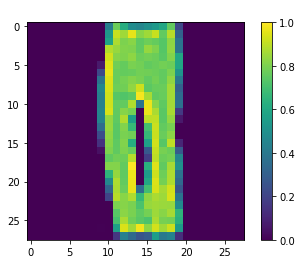

In [50]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)


Pick a number: 9


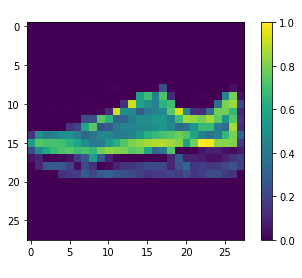

In [52]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)


Pick a number: 99


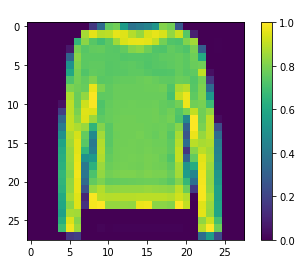

In [53]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)



Pick a number: 101


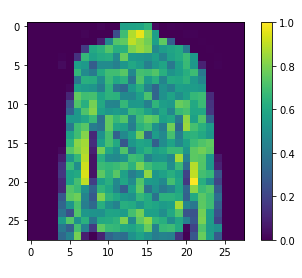

In [54]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
